# SIG720 - Machine Learning
## Task P1 (Pass Task)

#### Submitted by:
#### **Surya Pradeep Kumar Varma**
#### Deakin ID - **223020011**
#### Email Address - suryapradeepv@gmail.com

# Index

[Part I](#Part-I)<br>
[i. Load the Data](#i.-Load-the-Data)<br>
[1. Silhouette Analysis](#1.-Silhouette-Analysis:-Optimum-k-value-using-Silhouette-Coefficient-and-plot-the-optimum-k-values)<br>
[2. Create Clusters using Kmeans and Kmeans++](#2.-Create-clusters-using-Kmeans-and-Kmeans++-with-optimum-no.-of-clusters)<br>
[3. Average Performance for 50 iterations](#3.-Avg.-Performance-across-50-iterations-for-Kmeans-and-Kmeans++-for-optimum-clusters)<br>
[4. DBSCAN](#4.-DBSCAN)<br>
<br>
[Part II](#Part-II)<br>
[i. Load and Normalize the Data](#i.-Normalizing-data)<br>
[ii. PCA Dimensionality Reduction](#ii.-PCA)<br>
[1. Variance Explained by frist three principal components](#1.-Variance-Explained-by-first-3-components)<br>
[2. Correlation between first three components](#2.-Correlation-between-three-components)<br>
[3. t-SNE](#3.-t-SNE)<br>
[4. Comparision between t-SNE and PCA](#4.-Comparison-between-the-results-obtained-using-t-SNE-and-PCA)<br>

[References](#References)

# Part I

## i. Load the Data

In [1]:
# Import essential libraries

import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# No header / Column names present in the csv file => passing header=None
df = pd.read_csv("./digitData2.csv", header=None)
df.head(7)

0    1     2     3     4     5    6    7    8    9   ...   55   56   57  \
0  0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5  0.0  0.0  12.0  10.0   0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
6  0.0  0.0   0.0  12.0  13.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63   64  
0  6.0  13.0  10.0   0.0  0.0  0.0  0.0  
1  0.0  11.0  16.0  10.0  0.0  0.0  1.0  
2  0.0   3.0  11.0  16.0  9.0  0.0  2.0  
3  7.0  13.0  13.0   9.0  0.0  0.0  3.0  
4  0.0   2.0  16.0   4.0  0.0  0.0  4.0  
5  9.0  16.0  16.0  10.0  0.0  0.0  5.0  
6  1.0   9.0  15.0  11.0  3.0  0.0  6.0  

[7 rows x 65 columns]

In [3]:
df.shape

(1528, 65)

In [4]:
df.info()  # no missing values, all columns are floating points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1528 non-null   float64
 1   1       1528 non-null   float64
 2   2       1528 non-null   float64
 3   3       1528 non-null   float64
 4   4       1528 non-null   float64
 5   5       1528 non-null   float64
 6   6       1528 non-null   float64
 7   7       1528 non-null   float64
 8   8       1528 non-null   float64
 9   9       1528 non-null   float64
 10  10      1528 non-null   float64
 11  11      1528 non-null   float64
 12  12      1528 non-null   float64
 13  13      1528 non-null   float64
 14  14      1528 non-null   float64
 15  15      1528 non-null   float64
 16  16      1528 non-null   float64
 17  17      1528 non-null   float64
 18  18      1528 non-null   float64
 19  19      1528 non-null   float64
 20  20      1528 non-null   float64
 21  21      1528 non-null   float64
 22  

> **The last column of each file presents the label and the rest of the columns are features.**

In [5]:
# Given last column is the label, renaming that column as "label" (ground truth)
df.rename(columns = {64: "label"}, inplace = True)
y = df["label"]

df["label"].value_counts()

label
3.0    157
1.0    156
6.0    155
5.0    154
4.0    153
7.0    153
0.0    152
9.0    151
2.0    150
8.0    147
Name: count, dtype: int64

In [6]:
df["label"].unique(), len(df["label"].value_counts())

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]), 10)

> **All classes seem to be balanced, i.e there are 10 different groups with a balanced dataset**

In [7]:
y.head(7)

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
Name: label, dtype: float64

In [8]:
# Rename the other columns as features

X = df.drop("label", axis=1)  # features df
X.columns = ["feature_" + str(i+1) for i in range(X.shape[1])]  # rename columns
X.head(7)

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   
5        0.0        0.0       12.0       10.0        0.0        0.0   
6        0.0        0.0        0.0       12.0       13.0        0.0   

   feature_7  feature_8  feature_9  feature_10  ...  feature_55  feature_56  \
0        0.0        0.0        0.0         0.0  ...         0.0         0.0   
1        0.0        0.0        0.0         0.0  ...         0.0         0.0   
2        0.0        0.0        0.0         0.0  ...         5.0         0.0   
3        0.0        0.0        0.0         8.0  ...         9.0         0.0   
4        0.0        0.0        0.0         0.0  ...         0.0         0.0   
5        0.0        0.0        0.0         0.0  ...         4.0         0.0   
6        0.0        0.0        0.0         0.0  ...         8.0         0.0   

   feature_57  feature_58  feature_59  feature_60  feature_61  feature_62  \
0         0.0         0.0         6.0        13.0        10.0         0.0   
1         0.0         0.0         0.0        11.0        16.0        10.0   
2         0.0         0.0         0.0         3.0        11.0        16.0   
3         0.0         0.0         7.0        13.0        13.0         9.0   
4         0.0         0.0         0.0         2.0        16.0         4.0   
5         0.0         0.0         9.0        16.0        16.0        10.0   
6         0.0         0.0         1.0         9.0        15.0        11.0   

   feature_63  feature_64  
0         0.0         0.0  
1         0.0         0.0  
2         9.0         0.0  
3         0.0         0.0  
4         0.0         0.0  
5         0.0         0.0  
6         3.0         0.0  

[7 rows x 64 columns]

## 1. Silhouette Analysis: Optimum k value using Silhouette Coefficient and plot the optimum k values

In [9]:
#!pip -q install yellowbrick

# We use YellowBrick library
# to draw the silhouette plots and perform comparative analysis
from yellowbrick.cluster import SilhouetteVisualizer

Refer for yellowbrick docs: https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html?highlight=silhouette

In [10]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [11]:
# Calculate Silhouette Coefficient for different number of clusters
for k in range(2, 35):
    # Create KMeans instance for different number of clusters    
    clusterer = KMeans(n_clusters=k, init='k-means++', n_init='warn', max_iter=500, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters {k}, The average silhouette_score is: {silhouette_avg}")

For n_clusters 2, The average silhouette_score is: 0.11910021226712474
For n_clusters 3, The average silhouette_score is: 0.12841939724441825
For n_clusters 4, The average silhouette_score is: 0.13151039327284883
For n_clusters 5, The average silhouette_score is: 0.13925401338025364
For n_clusters 6, The average silhouette_score is: 0.15763854651582393
For n_clusters 7, The average silhouette_score is: 0.16970347487484527
For n_clusters 8, The average silhouette_score is: 0.1847772906133326
For n_clusters 9, The average silhouette_score is: 0.1950912910218039
For n_clusters 10, The average silhouette_score is: 0.1882049018801924
For n_clusters 11, The average silhouette_score is: 0.186403731846283
For n_clusters 12, The average silhouette_score is: 0.1865750707822821
For n_clusters 13, The average silhouette_score is: 0.18715013875775569
For n_clusters 14, The average silhouette_score is: 0.18250943441529982
For n_clusters 15, The average silhouette_score is: 0.17518097741824254
For n_

> **The value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighbouring clusters. A negative score [-1, 0] indicate that the samples might have got assigned to the wrong clusters.**

<h3><b>Checking from the silhouette coefficient value is best for 9 clusters indicating relatively well-seperated clusters with least number of clusters. Next we can check in the silhouette plots</b></h3>

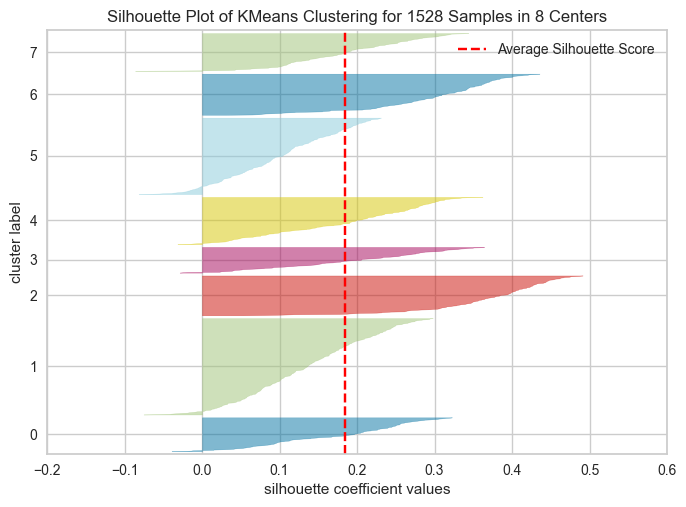

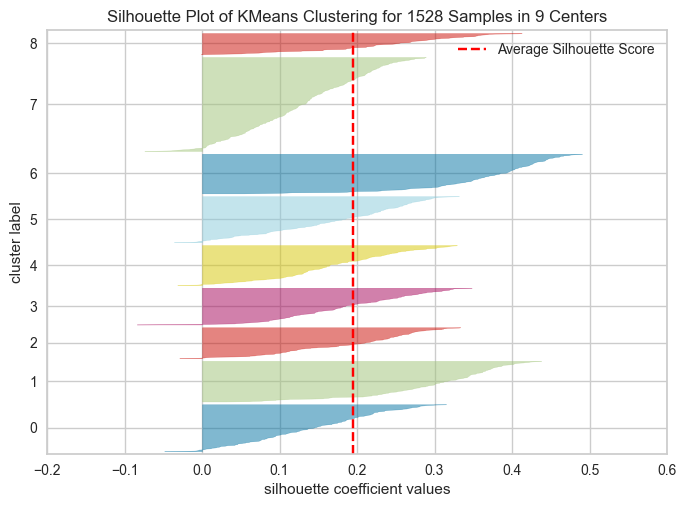

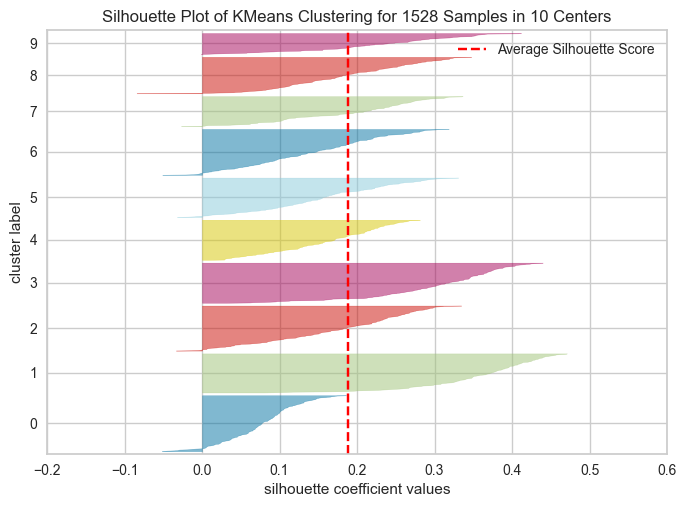

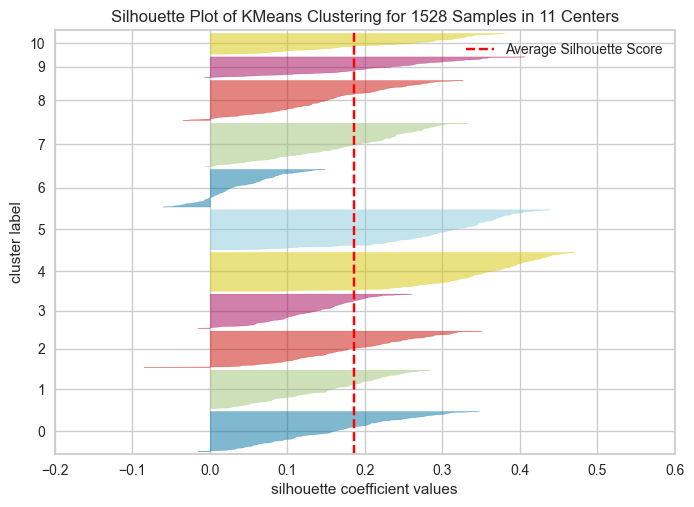

In [12]:
# Visualize Silhouette plots for different number of clusters

for k in range(8, 12):
    # Create KMeans instance for different number of clusters    
    clusterer = KMeans(n_clusters=k, init='k-means++', n_init='warn', max_iter=500, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Create SilhouetteVisualizer instance with KMeans instance and Fit the visualizer
    visualizer = SilhouetteVisualizer(clusterer, colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

### Optimal number of clusters: 
* **8** seems to be suboptimal as:
    * Thicknes of clusters or number of values in clusters varies with some thicker and other thinner clusters
* **9** also seems to be not ideal as:
    * Although, it has marginally better overall average silhouette score, there's one thicker cluster and relatively more negative silhouette scores in some clusters
* **11** also seems to suboptimal as:
    * we have a cluster with much less than average score and also has negative silhouette score
* Hence, **10** seems to be the relatively the **most ideal number of clusters** because:
    * The thickness of clusters is more uniform than the plot
    * Good Average Silhouette score
    * Less fluctuations and negative silhouette scores compared to all

## 2. Create clusters using Kmeans and Kmeans++ with optimum no. of clusters

In [13]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [14]:
num_clusters = 10  # optimal clusters

In [15]:
# Kmeans- simple random initialization of centroids

clusterer = KMeans(n_clusters=num_clusters, init='random', max_iter=500, random_state=10)
cluster_labels = clusterer.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"For n_clusters {num_clusters}, \nThe average silhouette score: {silhouette_avg:.8f}")
print(f"purity_score: {purity_score(y, cluster_labels):.8f}")

For n_clusters 10, 
The average silhouette score: 0.18814872
purity_score: 0.81151832


In [16]:
# Kmeans++ initialization

clusterer = KMeans(n_clusters=num_clusters, init='k-means++', n_init='warn', max_iter=500, random_state=10)
cluster_labels = clusterer.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"For n_clusters {num_clusters}, \nThe average silhouette score: {silhouette_avg:.8f}")
print(f"purity_score: {purity_score(y, cluster_labels):.8f}")

For n_clusters 10, 
The average silhouette score: 0.18820490
purity_score: 0.81151832


> **We can see that for the same number of clusters, when we perform clustering with Kmeans and Kmeans++, we see a very slight improvement in the average silhouette score and no change in purity. The homogeneity of classes produced are same as purity is same, but the classes might be a bit more well-separated because of the small bump in average silhouette score**

## 3. Avg. Performance across 50 iterations for Kmeans and Kmeans++ for optimum clusters

In [17]:
# Kmeans- simple random initialization of centroids

silhouette_scores, purity_scores = [], []
for i in range(50):
    clusterer = KMeans(n_clusters=num_clusters, init='random', max_iter=200)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_scores.append(silhouette_score(X, cluster_labels))
    purity_scores.append(purity_score(y, cluster_labels))

print(f"For n_clusters {num_clusters}, \nThe mean silhouette score: {np.mean(silhouette_scores):.8f} | median: {np.median(silhouette_scores):.8f}")
print(f"Mean purity score: {np.mean(purity_scores):.8f} | Median score: {np.median(purity_scores):.8f}")

For n_clusters 10, 
The mean silhouette score: 0.18841643 | median: 0.18819066
Mean purity score: 0.80848168 | Median score: 0.81053665


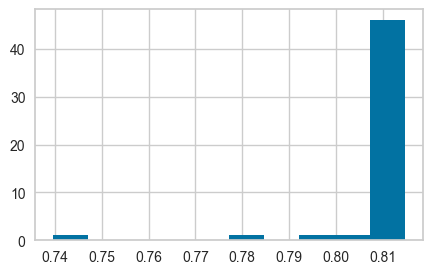

In [18]:
plt.figure(figsize=(5, 3))
plt.hist(purity_scores)
plt.show()

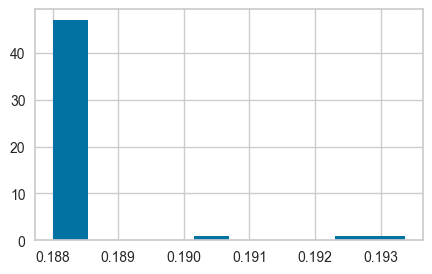

In [19]:
plt.figure(figsize=(5, 3))
plt.hist(silhouette_scores)
plt.show()

In [20]:
# Kmeans++ initialization

silhouette_scores, purity_scores = [], []
for i in range(50):
    clusterer = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=200)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_scores.append(silhouette_score(X, cluster_labels))
    purity_scores.append(purity_score(y, cluster_labels))

mean_silhouette = np.mean(silhouette_scores)
mean_purity = np.mean(purity_scores)

print(f"For n_clusters {num_clusters}, \nThe mean silhouette score: {np.mean(silhouette_scores):.8f} | median: {np.median(silhouette_scores):.8f}")
print(f"Mean purity score: {np.mean(purity_scores):.8f} | Median score: {np.median(purity_scores):.8f}")

For n_clusters 10, 
The mean silhouette score: 0.18818961 | median: 0.18819505
Mean purity score: 0.81052356 | Median score: 0.81086387


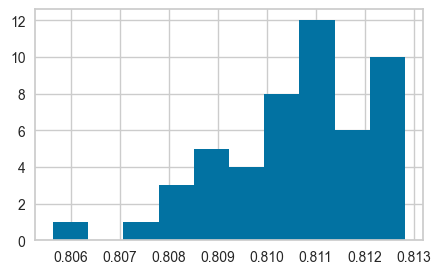

In [21]:
plt.figure(figsize=(5, 3))
plt.hist(purity_scores)
plt.show()

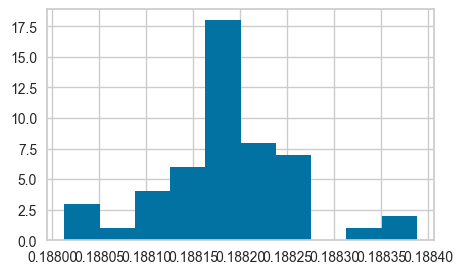

In [22]:
plt.figure(figsize=(5, 3))
plt.hist(silhouette_scores)
plt.show()

> **We can see that for the same number of clusters, when we perform clustering with Kmeans and Kmeans++ across 50 iterations without a seed, we see a very slight dip in the average silhouette score and an increase in the average purity. The homogeneity of classes produced has improved on average with kmeans++ itialization. This is also owed to the random nature of the kmeans algorithm itself.**

> **From the histogram plots of silhouette score, we can see that in the regular kmeans with random initialization, the scores are a lot more varied and it has a few high scores. As mean is not very robust against outliers, these extreme values would be pulling the mean value of silhouette score for kmeans. So, kmeans++ would still be a better algorithm. Also, we can use median as a more robust measure across the 50 iterations** 

> **Alos, from the histogram plots, we can see that with kmeans++ initialization, we see that the scores are pretty consistent and seem to follow a normal distribution across multiple runs. But, for random initialization the scores are a lot more varied. Hence, it's always better to perform clustering with kmeans++ initialization method.**

## 4. DBSCAN

> **DBSCAN** - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

> While the parameter `min_samples` primarily controls how tolerant the algorithm is towards noise (on noisy and large data sets it may be desirable to increase this parameter), the parameter `eps` is crucial to choose appropriately for the data set and distance function and usually cannot be left at the default value. It controls the local neighborhood of the points.<br>**When chosen too small, most data will not be clustered at all (and labeled as -1 for “noise”). When chosen too large, it causes close clusters to be merged into one cluster, and eventually the entire data set to be returned as a single cluster.**
> We have to choose the eps and min_samples appropirately for the dataset

In [23]:
from sklearn.cluster import DBSCAN

db_scan = DBSCAN(eps=25, min_samples=10)
clusters = db_scan.fit_predict(X)

# Cluster labels. Noisy samples are given the label -1.
np.unique(clusters)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

   * `eps`: Two points are considered neighbors if the distance between the two points is below the threshold epsilon
   * `min_samples`: The minimum number of neighbors a given point should have in order to be classified as a core point. It’s important to note that the point itself is included in the minimum number of samples

> `min_samples`: A rule of thumb is to set it to be greater than or equal to the number of dimensions D in the data set, i.e., `min_samples` ≥ D + 1. A low value of `min_samples`, such as 1, is not meaningful because it results in each point forming its own cluster. If `min_samples`≤ 2, the result will be similar to hierarchical clustering with the single link metric, where the dendrogram is cut at height ε. Therefore, `min_samples` must be at least 3. However, larger values are usually better for data sets with noise as they lead to more significant clusters. A value of `min_samples` = 2·D is a good rule of thumb, but larger values may be necessary for large or noisy data sets or those containing many duplicates. (Source:  (Sander et al., 1998).)

>However, you generally should be careful about the problem of curse of dimensionality if you transform your features to such a high dimensional space.

In [24]:
X.shape

(1528, 64)

In [25]:
# select min_samples as > 3 and less than D + 1 as we have high number of features and smaller dataset
min_samples = 10
min_samples

10

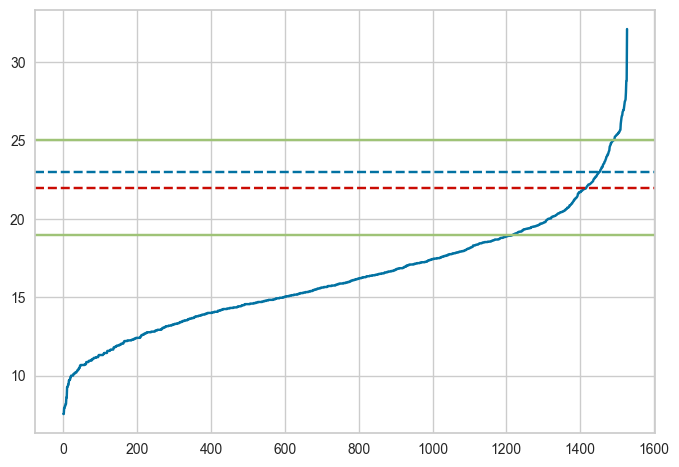

In [26]:
# using min_samples as nearest neighbors, determine eps value using knee plot method

from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(X)

# get the distances between pairs of nearest neighbours and sort them
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.axhline(y=19, color='g', linestyle='-')
plt.axhline(y=25, color='g', linestyle='-')
plt.axhline(y=22, color='r', linestyle='--')
plt.axhline(y=23, color='b', linestyle='--')
plt.show()

> **The optimal value for epsilon will be found at the point of maximum curvature. The ideal value for ε will be equal to the distance value at the “crook of the elbow”, or the point of maximum curvature. This point represents the optimization point where diminishing returns are no longer worth the additional cost. This concept of diminishing returns applies here because while increasing the number of clusters will always improve the fit of the model, it also increases the risk that overfitting will occur. So, the best value is somewhere between 19 and 24. We can select it as 22 or 23 by checking the plot**

In [27]:
# also checking for metrics with different eps values to determine exact value of eps

for ep in range(18, 26):
    db_scan = DBSCAN(eps=ep, min_samples=min_samples)
    clusters = db_scan.fit_predict(X)
    print(f"eps: {ep} | no. of clusters: {len([l for l in np.unique(clusters) if l != -1])}")
    print(f"purity score: {purity_score(y, clusters):.4f}")
    print(f"Silhouette score: {silhouette_score(X, clusters):.4f}\n")

eps: 18 | no. of clusters: 10
purity score: 0.3207
Silhouette score: -0.1233

eps: 19 | no. of clusters: 11
purity score: 0.4162
Silhouette score: -0.0579

eps: 20 | no. of clusters: 16
purity score: 0.6034
Silhouette score: 0.0043

eps: 21 | no. of clusters: 14
purity score: 0.7173
Silhouette score: 0.0726

eps: 22 | no. of clusters: 13
purity score: 0.7088
Silhouette score: 0.1038

eps: 23 | no. of clusters: 11
purity score: 0.7232
Silhouette score: 0.1393

eps: 24 | no. of clusters: 9
purity score: 0.6158
Silhouette score: 0.1056

eps: 25 | no. of clusters: 5
purity score: 0.3298
Silhouette score: 0.0210



In [28]:
# Final model evaluation

db_scan = DBSCAN(eps=23, min_samples=min_samples)
clusters = db_scan.fit_predict(X)
print(f"eps: {ep} | no. of clusters: {len([l for l in np.unique(clusters) if l != -1])}")
print(f"purity score: {purity_score(y, clusters):.4f}")
print(f"Silhouette score: {silhouette_score(X, clusters):.4f}\n")

eps: 25 | no. of clusters: 11
purity score: 0.7232
Silhouette score: 0.1393



> The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples).

> **Hence, we can see that the optimum value of epsilon between 20 and 25 can be considered to be `23` as we have highest silhouette score and purity score for it. Also, we find that db_scan produces 11 different clusters for the optimum clustering. This is because DBScan works differently to kmeans. Also, DBScan is not entirely the best fit for this dataset as we don't have clusters seperated by density. This is also evident by the slightly lower purity and silhouette scores produced in DBScan**

# Part II

In [ ]:
# Load diabetes dataset from Sklearn
from sklearn import datasets

dataset = datasets.load_diabetes()
dataset.keys()

In [30]:
print(dataset["DESCR"])  # description

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [31]:
dataset["feature_names"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [32]:
X = dataset["data"]
X.shape

(442, 10)

In [33]:
y = dataset["target"]
y.shape

(442,)

In [34]:
# a quantitative measure of disease progression one year after baseline
y[:50]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142.])

## i. Normalizing data

Normalizing before PCA is very important

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
X_scaled.shape

(442, 10)

## ii. PCA

In [9]:
X_scaled = np.array([[-1, 1], [0, 0], [1, 1]])
X_scaled

array([[-1,  1],
       [ 0,  0],
       [ 1,  1]])

In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Defining the number of principal components to generate
n = 1

# Storing PCA function with n components
pca = PCA(n_components = n, random_state = 7)

# Applying PCA on scaled data
X_pca = pd.DataFrame(pca.fit_transform(X_scaled))       

pca_components = pd.DataFrame(pca.components_)
pca_components.head(3)

0    1
0  1.0  0.0

In [38]:
pca.components_.shape

(10, 10)

In [39]:
pca_components.shape

(10, 10)

## 1. Variance Explained by first 3 components

In [40]:
# The percentage of variance explained by each principal component is stored
var_exp = (pca.explained_variance_ratio_)
var_exp

array([0.40242108, 0.14923197, 0.12059663, 0.09554764, 0.06621814,
       0.06027171, 0.05365657, 0.0433682 , 0.007832  , 0.00085607])

> After getting the principal components, to compute the percentage of variance (information) accounted for by each component, we divide the eigenvalue of each component by the sum of eigenvalues.
<br>
> Percentage of Variance: The percentage of variance explained by each principal component is calculated by dividing its eigenvalue by the sum of all eigenvalues.

> **Percentage of Variance Explained by PCi = (Eigenvalue of PCi) / (Sum of all Eigenvalues)**

> Cumulative Variance: Often, we are interested in the cumulative variance explained by a subset of principal components. This is useful to determine how much information is retained when using a certain number of principal components. The cumulative variance for the first k principal components is obtained by summing the percentage of variance explained by those components.

> **Cumulative Variance (k) = Sum of the Percentage of Variance for the first k principal components**

> By analyzing the percentage of variance explained by each principal component, one can **make an informed decision about how many principal components to retain for dimensionality reduction**. Typically, a cumulative variance of around 95% or higher is considered a good choice, as it retains most of the information from the original data while reducing its dimensionality.**

In [41]:
var_exp[:3]  # variance explained by each three components

array([0.40242108, 0.14923197, 0.12059663])

In [42]:
print(f"Cumulative percentage of variance explained by first three components: {np.sum(var_exp[:3]) * 100:.2f} %")

Cumulative percentage of variance explained by first three components: 67.22 %


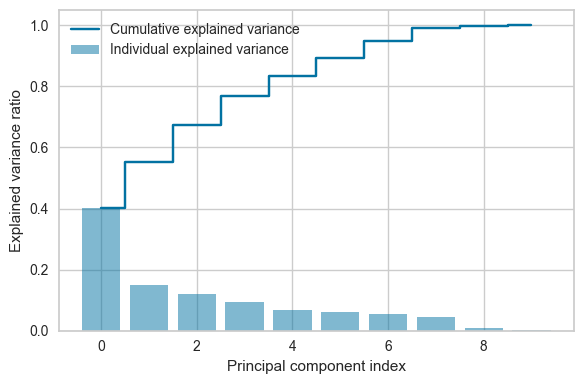

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## 2. Correlation between three components

> **All PCA principle components are chosen to be orthogonal to each other, implying that they are uncorrelated**. The fundamental aspect of PCA is orthogonality, which ensures that each principle component captures a different and independent source of variance in the data. **As a result, the correlation between the first three major components is near to zero.**

> **Because the principle components do not duplicate information and give a meaningful representation of the variability in the original data, orthogonality in PCA allows for effective dimensionality reduction.** One of the reasons PCA is so popular for feature extraction and data compression tasks is its independence of primary components. It aids in identifying the most essential patterns in the data while removing correlations between the altered features.

In [44]:
# double-checking the correlation between first three compoenents

corr_df = pca_components[[0, 1, 2]].corr()
corr_df

0         1         2
0  1.000000 -0.013020  0.031385
1 -0.013020  1.000000  0.009132
2  0.031385  0.009132  1.000000

In [45]:
print(f"Correlations between (0, 1), (0, 2), (1, 2): {corr_df[0][1], corr_df[0][2], corr_df[1][2]}")

Correlations between (0, 1), (0, 2), (1, 2): (-0.013020236338935686, 0.031384912147880334, 0.009131691634305746)


> **Hence, the correlations between the principle components is near-zero as expected**

## 3. t-SNE

> **t-SNE** (t-distributed Stochastic Neighbor Embedding) is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data. Non-linear dimensionality reduction means that the algorithm allows us to separate data that cannot be separated by a straight line. 

> The t-SNE algorithm finds the similarity measure between pairs of instances in higher and lower dimensional space. After that, it tries to optimize two similarity measures. It does all of that in three steps. 

* t-SNE models a point being selected as a neighbor of another point in both higher and lower dimensions. It starts by calculating a pairwise similarity between all data points in the high-dimensional space using a Gaussian kernel. The points that are far apart have a lower probability of being picked than the points that are close together. 
* Then, the algorithm tries to map higher dimensional data points onto lower dimensional space while preserving the pairwise similarities. 
* It is achieved by minimizing the divergence between the probability distribution of the original high-dimensional and lower-dimensional. The algorithm uses gradient descent to minimize the divergence. The lower-dimensional embedding is optimized to a stable state.

In [46]:
from sklearn.manifold import TSNE

for k in range(1, 4):
    tsne = TSNE(n_components=k, random_state=7)
    
    # Apply t-SNE to the data
    X_tsne = tsne.fit_transform(X_scaled)
    
    print(f"NO. of components {k} | KL Divergence {tsne.kl_divergence_}")

NO. of components 1 | KL Divergence 1.2883801460266113
NO. of components 2 | KL Divergence 0.8774340152740479
NO. of components 3 | KL Divergence 0.7150232195854187


In [47]:
# Initialize t-SNE with 3 components
tsne = TSNE(n_components=k, random_state=7)

# Apply t-SNE to the data
X_tsne = tsne.fit_transform(X_scaled)

print(f"NO. of components {k} | KL Divergence {tsne.kl_divergence_}")

NO. of components 3 | KL Divergence 0.7150232195854187


> KL divergence is a statistical tool that allows you to measure the similarity between two distributions. It gives you the information lost when you use a distribution to approximate another. So if the KL divergence is minimised, we would have found a distribution that is a very good lower-dimensional approximation of the higher dimensional distribution of similar and dissimilar objects.

In [48]:
X_tsne.shape

(442, 3)

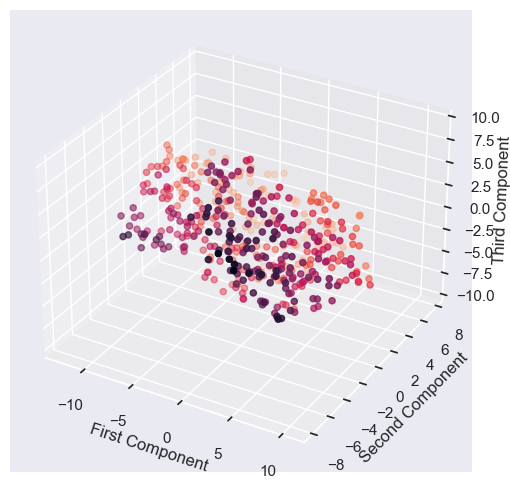

In [49]:
import seaborn as sns
sns.set()

# Visualizing First 3 components of t-SNE
x = X_tsne[:, 0]
y = X_tsne[:, 1]
z = X_tsne[:, 2]

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=y)  # c (color = y | target regression variable)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
plt.show()

## 4. Comparison between the results obtained using t-SNE and PCA

###  **t-SNE vs PCA**

Both** t-SNE and PCA are dimensional reduction technique**s that have different mechanisms and work best with** different types of data**.
**

PCA (Principal Component Analysis) is a linear technique that works best with data that has a linear struct**ure. It seeks to identify the underlying principal components in the data by projecting onto lower dimensions, minimizing variance, and preserving large pairwise distancs.**But, t-SNE is a nonlinear technique that focuses on preserving the pairwise similarities between data points in a lower-dimensional space. t-SNE is concerned with preserving small pairwise distances whereas, PCA focuses on maintaining large pairwise distances to maximize vari**ance.

In su**mmary, PCA preserves the variance in the data, whereas t-SNE preserves the relationships between data points in a lower-dimensional space, making it quite a good algorithm for visualizing complex high-dimensiona**l data. 

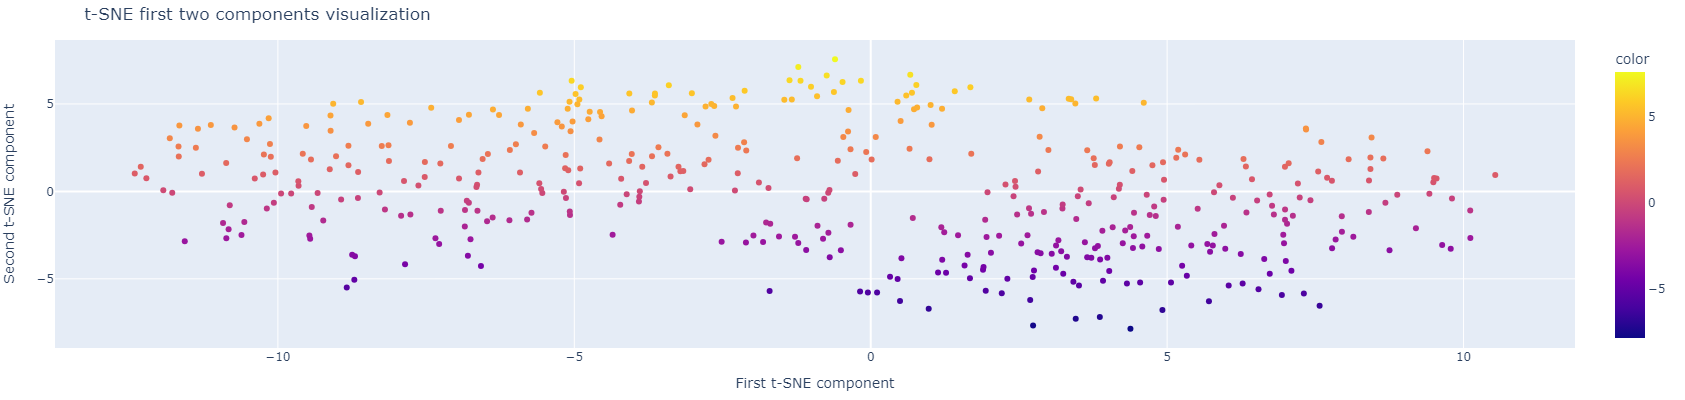

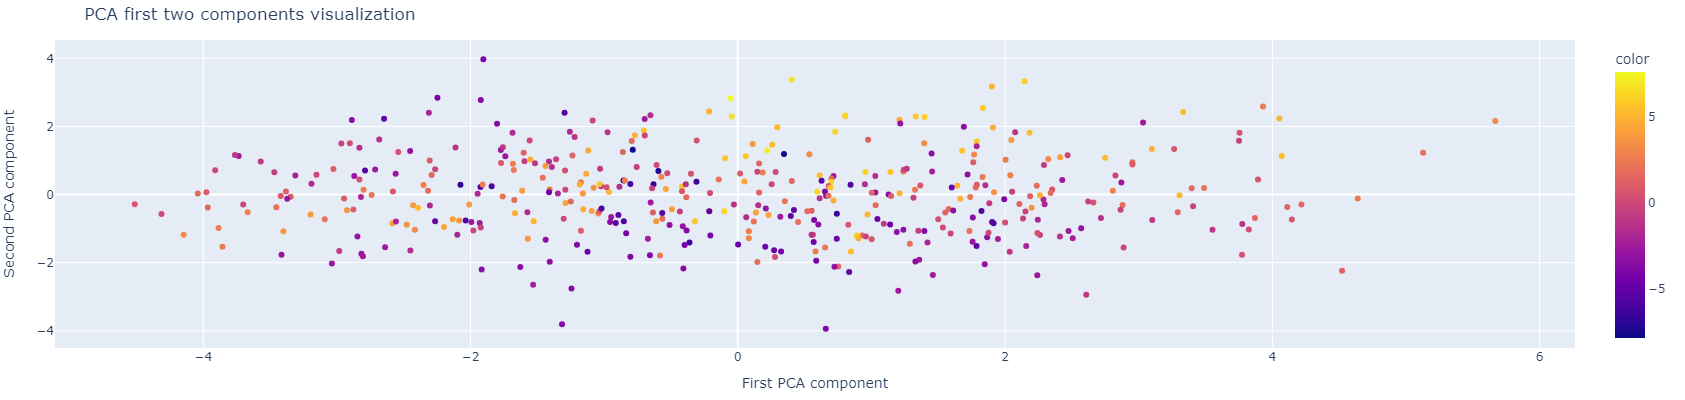

In [50]:
# visualize first two components of t-sne and PCA w.r.t target variable y

# !pip install plotly
import plotly.express as px

fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y)
fig.update_layout(
    title="t-SNE first two components visualization",
    xaxis_title="First t-SNE component",
    yaxis_title="Second t-SNE component",
    width=800, height=400
)

fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=30),
    paper_bgcolor="white",
)
fig.show()

fig = px.scatter(x=X_pca[0], y=X_pca[1], color=y)
fig.update_layout(
    title="PCA first two components visualization",
    xaxis_title="First PCA component",
    yaxis_title="Second PCA component",
    width=800, height=400
)

fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=30),
    paper_bgcolor="white",
)
fig.show()

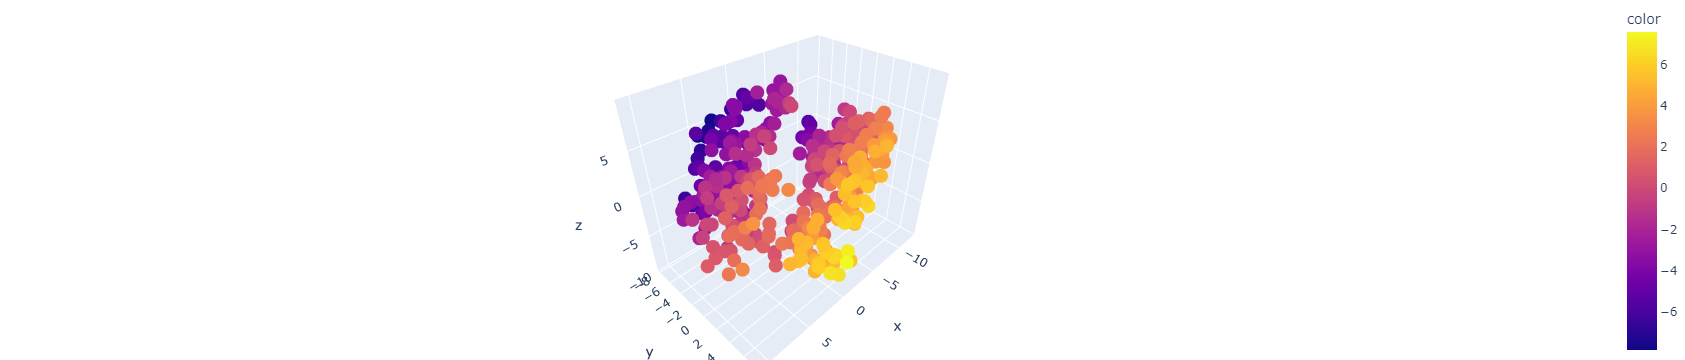

In [51]:
# visualize first three components of t-sne w.r.t target variable y

fig = px.scatter_3d(x=X_tsne[:, 0], y=X_tsne[:, 1], z=X_tsne[:, 2], color=y, height=700)
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

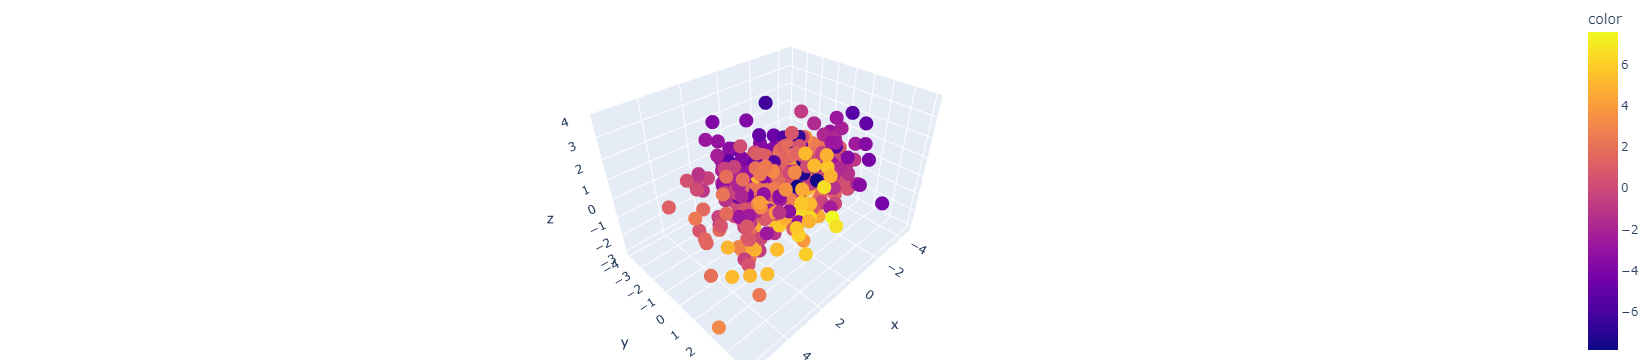

In [52]:
# visualize first three components of PCA w.r.t target variable y

fig = px.scatter_3d(x=X_pca[0], y=X_pca[1], z= X_pca[2], color=y, height=700)
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

> **We can see in the 3d scatter plots that t-SNE still does a better job of separation of the color i.e, the target variable range y in 3 dimensions using just first three components. This shows that t-SNE, the more advanced algorithm, is a better fit for this data and can separate the data which seems to be non-linear**

## References

[1] Kumar, S 2020, Silhouette Method — Better than Elbow Method to find Optimal Clusters, Medium.<br>
‌[2] Silhouette Visualizer — Yellowbrick v1.5 documentation n.d., www.scikit-yb.org, viewed 22 July 2023, <https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html?highlight=silhouette>.<br>
[3] scikit-learn 2019, sklearn.cluster.KMeans — scikit-learn 0.21.3 documentation, Scikit-learn.org.<br>
‌[4] 2.3. Clustering n.d., scikit-learn.<br>
[5] Scikit-learn.org. (2017). sklearn.cluster.DBSCAN — scikit-learn 0.22 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html.<br>
[6] Amir Masoud Sefidian - Sefidian Academy. (2022). How to determine epsilon and MinPts parameters of DBSCAN clustering. [online] Available at: http://www.sefidian.com/2022/12/18/how-to-determine-epsilon-and- [Accessed 22 Jul. 2023].<br>
[7] www.datacamp.com. (n.d.). Python t-SNE with Matplotlib. [online] Available at: https://www.datacamp.com/tutorial/introduction-t-sne.